In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

**new latex command for braket**
$
% basic braket
\newcommand{\bra}[2][]{\mathinner{\langle #2\rvert}_{#1}}
\newcommand{\ket}[2][]{\mathinner{\lvert#2\rangle}_{\hspace{-0.1em}#1}}
\newcommand{\Bra}[2][]{\left<#2\right|_{#1}}
\newcommand{\Ket}[2][]{\left|#2\right>_{\hspace{-0.1em}#1}}
\newcommand{\bigBra}[2][]{\bigl<#2\bigr|_{#1}}
\newcommand{\bigKet}[2][]{\bigl|#2\bigr>_{\hspace{-0.1em}#1}}
\newcommand{\BigBra}[2][]{\Bigl<#2\Bigr|_{#1}}
\newcommand{\BigKet}[2][]{\Bigl|#2\Bigr>_{\hspace{-0.1em}#1}}
\newcommand{\biggBra}[2][]{\biggl<#2\biggr|_{#1}}
\newcommand{\biggKet}[2][]{\biggl|#2\biggr>_{\hspace{-0.1em}#1}}
\newcommand{\BiggBra}[2][]{\Biggl<#2\Biggr|_{#1}}
\newcommand{\BiggKet}[2][]{\Biggl|#2\Biggr>_{\hspace{-0.1em}#1}}
% ---- compound Dirac notation ----
\newcommand{\ketbra}[3][]{\mathinner{\lvert#2\rangle\langle#3\rvert}_{#1}}
\newcommand{\braket}[3][]{\mathinner{\langle#2\vert#3\rangle}_{}#1}
\newcommand{\Ketbra}[3][]{\left|#2\middle>\middle<#3\right|_{#1}}
\newcommand{\proj}[2][]{\ketbra[#1]{#2}{#2}}
\newcommand{\Proj}[2][]{\Ketbra[#1]{#2}{#2}}
% ---- mathrm ----
\newcommand{\mr}[2][]{\mathrm{#2}_{#1}}
% ---- partial derivative -----
\newcommand{\pdv}[3][]{\frac{\partial#2}{\partial#3}_{#1}}
$

## 5.4 Maxwell-Shrodinger equations

The **Shrodinger equation** for density matrix fo a single two-level **atom** is given by

$$
\begin{aligned}
    \dot{\rho}_{aa} &= r_a \rho^{(0)}_{aa} - \gamma_a \rho_{aa} + \frac{i}{\hbar} [\wp_{ab} E \rho_{ba} - \mr{c.c.}],\\
    \dot{\rho}_{bb} &= r_b \rho^{(0)}_{bb} - \gamma_b \rho_{bb} - \frac{i}{\hbar} [\wp_{ab} E \rho_{ba} - \mr{c.c.}],\\
    \dot{\rho}_{ab} &= - (i \omega + \gamma) \rho_{ab} - \frac{i}{\hbar} \wp_{ab} E (\rho_{aa} - \rho_{bb}).
\end{aligned}
$$

The **Maxwell's equations** for the slowly varying single-mode **field** are given by

$$
\begin{aligned}
\pdv{E}{z} + \frac{1}{c} \pdv{E}{t} &= - \kappa E - \frac{1}{2\epsilon_0} k \Im P,\\
\pdv{\phi}{z} + \frac{1}{c} \pdv{\phi}{t} &= k - \frac{\nu}{c} - \frac{1}{2\epsilon_0} k E^{-1} \Re P,
\end{aligned}
$$

where $P$ is the slowly varying complex polarization given by $P(z, t) = 2 \wp \rho_{ab} \exp(\nu t - kz + \phi(z, t))$.

## 6.1 Atom-field interaction Hamiltonian

The interactio Hamiltonian is given by
$$
H = \sum_{k} \hbar \nu_k a^{\dagger}_k a_k
+ \frac{1}{2} \hbar \omega \sigma_z
+ \hbar \sum_k g_k (\sigma_+ + \sigma_-)(a_k + a^{\dagger}_k)
$$
The Pauli operators are defined by
$$
\begin{aligned}
\sigma_z &= \sigma_{aa} - \sigma_{bb} = \proj{a} - \proj{b}\\
\sigma_+ &= \sigma_{ab} = \ketbra{a}{b}\\
\sigma_- &= \sigma_{ba} = \ketbra{b}{a}
\end{aligned}
$$
And they satisfy that
$$
[\sigma_-, \sigma_+] = - \sigma_z,~\mr{and}~ [\sigma_-, \sigma_z] = 2\sigma_-
$$
The interaciton under rotating-wave approximation is given by
$$
H = \sum_{k} \hbar \nu_k a^{\dagger}_k a_k
+ \frac{1}{2} \hbar \omega \sigma_z
+ \hbar \sum_k g_k (\sigma_+ a_k + a^{\dagger}_k \sigma_-)
$$

In [4]:
sigmax()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

In [5]:
sigmay()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]

In [6]:
sigmaz()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [7]:
sigmap()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  1.]
 [ 0.  0.]]

In [8]:
sigmam()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  0.]
 [ 1.  0.]]

In [34]:
destroy(2)

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  1.]
 [ 0.  0.]]

In [37]:
create(2)

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  0.]
 [ 1.  0.]]

**Attention for Qubit (two-level) System**

The Pauli matrces defined in QuTip use the standard z-basis representation of the sigma-z spin operator. Therefore the spin up and spin down states are defined by

In [79]:
spin_up = fock(2, 0)
spin_down = fock(2, 1)

In [80]:
spin_up

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [81]:
spin_down

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

So actually the excited state of a spin is the groud state of a fock state. The ground state of a spin is the first excited state of a fock state. Now let's check if the laddar operators work.

In [82]:
sigmap() * spin_down

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [83]:
sigmam() * spin_up

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

## 6.2 Interaction of a single two-level atom with a single-mode field

For the interaction of a single-mode quantized field with a single two-level atom, we have

$$
H = \hbar \nu a^{\dagger} a
+ \frac{1}{2} \hbar \omega \sigma_z
+ \hbar g (\sigma_+ a + a^{\dagger} \sigma_-)
$$

The Hamiltonian in the interaction picture is given by Eq. (6.2.8)

$$
V = \hbar g (\sigma_+ a e^{i\Delta t} + a^{\dagger} \sigma_- e^{-i \Delta t}),
$$

where $\Delta = \omega - \nu$.

### 6.2.1 Probability amplitude method

The state vector is given by
$$
\ket{\psi} = \sum_n [c_{a,n}(t)\ket{a,n} + c_{b,n}\ket{b,n}]
$$
Using Shrodinger equation, we obtain
$$
\begin{aligned}
\dot{c}_{a,n} &= -ig\sqrt{n+1}e^{i \Delta t} c_{b,n+1}\\
\dot{c}_{b,n+1} &= -ig\sqrt{n+1}e^{-i \Delta t} c_{a,n}
\end{aligned}
$$

In [77]:
# show the results in Fig. 6.2
# initially the atom is in the excited state
# and the field is an coherent state
psi0 = tensor(fock(2, 0), coherent(50, 5))
# time
times = np.linspace(0.0, 80, 800)
# Hamiltonian
a = tensor(qeye(2), destroy(50))
sz = tensor(sigmaz(), qeye(50))
sm = tensor(sigmam(), qeye(50))
v = 2 * np.pi
w = 2 * np.pi
g = 2 * np.pi * 0.1
H = v * a.dag() * a + 0.5 * w * sz +  g * (sm * a.dag() + sm.dag() * a)
# solve
result = mesolve(H, psi0, times, [], [sz])

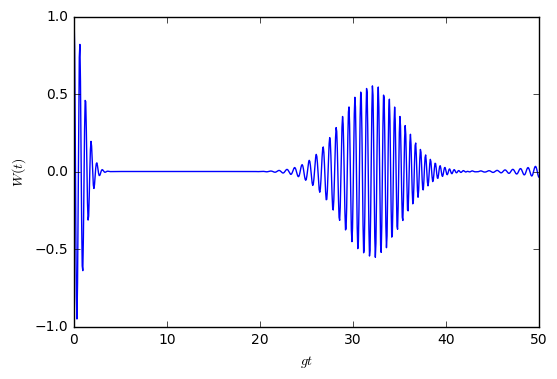

In [78]:
fig, ax = plt.subplots()
ax.plot(result.times * g, result.expect[0])
ax.set_xlabel('$gt$')
ax.set_ylabel('$W(t)$')
ax.set_xlim([0, 50])
plt.show()

### 6.2.2 Heisenberg operator method

### 6.2.3 Unitary time-evolution operator method

## 6.3 Weisskopf-Wigner theory of spontaneous emission between two atomic levels

The decay constant is given by

$$
\Gamma = \frac{1}{4 \pi \epsilon_0} \frac{4 \omega^3 \wp_{ab}^2}{3 \hbar c^3}.
$$

## 8.2 Atomic decay by thermal and squeezed vacuum reservoirs

In the interaction picture and the rotating-wave approximation, the Hamiltonian is simply

$$
V(t) = \hbar \sum_k g_k [b^{\dagger}_k \sigma_- e^{-i(\omega - v_k)t} + \sigma_+ b_k e^{i(\omega - v_k)t}], 
$$

where $\omega$ is the frequency of the atom, and $b_k$ is the annihilation opertor for the reservoir.

**Thermal reservoir**

The evolution equation for the reduced density operator $\rho_{\mr{atom}}$ is given by

$$
\begin{aligned}
\dot{\rho}_{\mr{atom}}(t) = &- \bar{n} \frac{\Gamma}{2} [\sigma_- \sigma_+ \rho_{\mr{atom}}(t) - \sigma_+ \rho_{\mr{atom}}(t) \sigma_-] \\
&- (\bar{n} + 1) \frac{\Gamma}{2} [\sigma_+ \sigma_- \rho_{\mr{atom}}(t) - \sigma_- \rho_{\mr{atom}}(t) \sigma_+] \\
&+ \mr{H.c}
\end{aligned}
$$

**Squeezed vacuum reservoir**

The evolution equation for the reduced density operator $\rho_{\mr{atom}}$ is given by

$$
\begin{aligned}
\dot{\rho}_{\mr{atom}} = 
&- \frac{\Gamma}{2} \cosh^2 r (\sigma_+ \sigma_- \rho_{\mr{atom}}   - 2\sigma_- \rho_{\mr{atom}} \sigma_+ + \rho_{\mr{atom}} \sigma_+ \sigma_-) \\
&- \frac{\Gamma}{2} \sinh^2 r (\sigma_- \sigma_+ \rho_{\mr{atom}}   - 2\sigma_+ \rho_{\mr{atom}} \sigma_- + \rho_{\mr{atom}} \sigma_- \sigma_+) \\
&- \Gamma e^{- i\theta} \sinh r \cosh r ~\rho_{\mr{atom}} \sigma_+\\
&- \Gamma e^{- i\theta} \sinh r \cosh r ~\rho_{\mr{atom}} \sigma_+
\end{aligned}
$$

## 8.3 Field damping

In the interaction picture and the rotating-wave approximation, the Hamiltioniam is given by

$$
V(t) = \hbar \sum_k g_k [b^{\dagger}_k a e^{-i(\omega - v_k)t} + a^{\dagger} b_k e^{i(\omega - v_k)t}], 
$$

where $a$ is the annihilation operator for the mode of interest, and $b_k$ is for the reservoir.

**Thermal reservoir**

The evolution equation is given as

$$
\begin{aligned}
\dot{\rho} = &- \frac{l}{2} \bar{n}_{\mr{th}} (a a^{\dagger} \rho - 2 a^{\dagger} \rho a + \rho a a^{\dagger}) \\
&- \frac{l}{2} (\bar{n}_{\mr{th}}  + 1) (a^{\dagger} a \rho   - 2 a \rho a^{\dagger}_- + \rho a^{\dagger} a ).
\end{aligned}
$$

If all losses are transimission losses, $l$ may be related to the quality factor $Q$ of the cavity by $l = \nu/Q$. In particular, at zero temperature ($\bar{n}_{th} == 0$), we have Eq. (8.3.3)

$$
\dot{\rho} = - \frac{l}{2} (a^{\dagger} a \rho   - 2 a \rho a^{\dagger}_- + \rho a^{\dagger} a ).
$$

**Squeezed vacuum reservoir**

The evolution equation is given as

$$
\begin{aligned}
\dot{\rho} = &- \frac{l}{2} N (a a^{\dagger} \rho - 2 a^{\dagger} \rho a + \rho a a^{\dagger}) \\
&- \frac{l}{2} (N  + 1) (a^{\dagger} a \rho   - 2 a \rho a^{\dagger}_- + \rho a^{\dagger} a ) \\
&+ \frac{l}{2} M (a a \rho - 2 a \rho a + \rho a a) \\
&+ \frac{l}{2} M^\ast (a^{\dagger} a^{\dagger} \rho   - 2 a^{\dagger} \rho a^{\dagger}_- + \rho a^{\dagger} a^{\dagger} ) \\
\end{aligned},
$$

where $N = \sinh^2 r$ and $M = \cosh r \sinh r \exp(- i \theta)$.

## 8.5 The 'quantum jump' approach to damping

## 11.1 Equation of motion for the density matrix

**Level Diagram**

<img src="figs\levels.png" width="50%" height="50%">

**Master Equation**

The Hamiltonian for the interaction of the active atoms, which are resonant with the single-mode laser field, in the interaction picture and the rotating-wave approximation 

$$
V = \sum_i V_i = \sum_i \hbar g (\sigma_+^i a + a^{\dagger} \sigma_-^i)
$$


The equation of motion for the laser field density matrix due to the interaction with the active lasing medium and the damping mechanism is

$$
\dot{\rho}_{n,n'} = - \frac{i}{\hbar} \mr{Tr_{atoms}}[V, \rho]_{n,n'} + (L\rho)_{n,n'}
$$

The first term desribes the interactions between atoms and the field, which in details is

$$
\left(\frac{\delta \rho_{n,n'}}{\delta t}\right)_{\mr{gain}} = - \frac{i}{\hbar} \sum_{\alpha_i = a,b} \sum_{i} [V^i, \rho^i]_{\alpha_i, n; \alpha_i, n'},
$$

where $\rho^i$ is the atom-field density matrix for the $i$th atom and the field

$$
\rho^{i}_{n,n'} = \sum_{\alpha_i, \alpha_i'} \rho_{\alpha_i, n; \alpha_i', n'}
$$

And we can introduce the generalized population matrix

$$
\rho_{a,n;b,n+1} = \sum_i \rho_{a, n; b, n}.
$$

Therefore we can obtain

$$
\begin{aligned}
\left(\frac{\delta \rho_{n,n'}}{\delta t}\right)_{\mr{gain}} = 
&- \frac{i}{\hbar} (V_{an, bn+1}\rho_{bn+1, an'} - \rho_{an,bn'+1}V_{bn'+1, an'}  \\
&+ V_{bn, an-1}\rho_{an-1,bn'} - \rho_{bn, an'-1}V_{an'-1, bn'} )
\end{aligned}
$$

The second term describes the damping of the field, which can be obtained from Eq. (8.3.3) by

$$
(L\rho)_{n,n'} =  \bra{n}L\rho\ket{n'} = - \frac{l}{2} (n + n') \rho_{nn'} + l \sqrt{(n+1)(n'+1)} \rho_{n+1, n'+1}
$$

**Equation of Motion for the Field**

$$
\begin{aligned}
\dot{\rho}_{nn'} =
&- \frac{M_{nn'}A}{1 + N_{nn'}B/A} \rho_{nn'} + \frac{\sqrt{nn'}A}{1 + N_{n-1,n'-1}B/A} \rho_{n-1,n'-1} \\
&- \frac{l}{2}(n+n')\rho_{nn'} + l\sqrt{(n+1)(n'+1)} \rho_{n+1, n'+1}
\end{aligned}
$$

where
$$
\begin{aligned}
A &= \frac{2r_a g^2}{\gamma^2},~ ~ ~B = \frac{4g^2}{\gamma^2} A,\\
M &= \frac{1}{2}(n+n'+2) + (n-n')^2\frac{B}{8A},\\
N &= \frac{1}{2}(n+n'+2) + (n-n')^2\frac{B}{16A}.
\end{aligned}
$$

In particular, for diagonal elements, we have

$$
\begin{aligned}
\dot{p}{n} =
&- \frac{(n+1)A}{1 + (n+1)B/A} p(n) + \frac{nA}{1 + nB/A} p(n-1) \\
&- lnp(n) + l(n+1)p(n+1)
\end{aligned}
$$

## 11.2 Laser photon statistics

### 11.2.1 Linear approximation ($B=0$)

In the steady state ($\dot{p}(n)=0$), the equation of motion reduces to

$$
-A(n+1)p(n) +Anp(n-1) - lnp(n) + l(n+1)p(n+1) = 0
$$

The detailed balance condition implies that

$$
\begin{aligned}
Anp(n-1) &- lnp(n) = 0\\
A(n+1)p(n) &- l(n+1)p(n+1) = 0
\end{aligned}
$$

The solution is clearly

$$
p(n) = \left(1 - \frac{A}{l} \right) \left( \frac{A}{l} \right)^n, ~~~ A < l. 
$$

By defining an effective temperature $T$ by

$$
\exp\left( - \frac{\hbar \nu}{k_B T} \right) = \frac{A}{B},
$$

we could obtain

$$
p(n) = \left[1 - \exp\left(-\frac{\hbar\nu}{k_B T}\right) \right] \exp\left(-\frac{n\hbar\nu}{k_B T} \right).
$$

So below the threshold, the steady-state solution is essentially that of a black-body cavity.

### 11.2.2 Far above threshold ($A >> B$)